In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test)=datasets.cifar10.load_data()
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
def plot_sample(X, y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

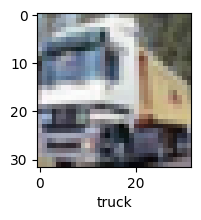

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
#Normalisation
X_train=X_train/255
X_test=X_test/255

In [ ]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 58s 36ms/step - loss: 2.4180 - accuracy: 0.0986
Epoch 2/10
1563/1563 [==============================] - 49s 31ms/step - loss: 2.3036 - accuracy: 0.0981
Epoch 3/10
1563/1563 [==============================] - 49s 31ms/step - loss: 2.3028 - accuracy: 0.0973
Epoch 4/10
1563/1563 [==============================] - 48s 31ms/step - loss: 2.3030 - accuracy: 0.0950
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 2.3028 - accuracy: 0.0980
Epoch 6/10
1563/1563 [==============================] - 49s 32ms/step - loss: 2.3028 - accuracy: 0.0958
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 2.3028 - accuracy: 0.0999
Epoch 8/10
1563/1563 [==============================] - 49s 32ms/step - loss: 2.3028 - accuracy: 0.0999
Epoch 9/10
1563/1563 [==============================] - 48s 31ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 10/10
1563/1563 [==============================] - 47s 30m

In [ ]:
y_pred=cnn.predict(X_test)
y_classes=[np.argmax(element) for element in y_pred]

313/313 [==============================] - 4s 12ms/step


In [ ]:
y_test=y_test.reshape(-1,)

Calculated Class: ship
Test Dataset Label:


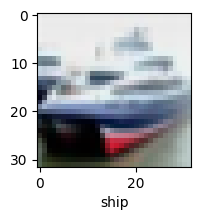

In [ ]:
print("Calculated Class:",classes[y_classes[1]])
print("Test Dataset Label:")
plot_sample(X_test, y_test, 1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report: \n",classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.82      0.84      0.83      1000
           2       0.65      0.51      0.57      1000
           3       0.54      0.47      0.50      1000
           4       0.58      0.69      0.63      1000
           5       0.56      0.68      0.62      1000
           6       0.75      0.79      0.77      1000
           7       0.75      0.75      0.75      1000
           8       0.81      0.81      0.81      1000
           9       0.85      0.73      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

